In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


In [4]:
import os

path = os.getcwd()
print(path)


/Users/hollygerrity/Desktop/Python/IntroDataAnalytics-master/datasets


In [5]:
DataFrame = pd.read_excel("titanic.xls", sheet_name=0)


In [6]:
DataFrame.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
DataFrame.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [8]:
DataFrame.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [9]:
DataFrame.count()

pclass       1309
survived     1309
name         1309
sex          1309
age          1046
sibsp        1309
parch        1309
ticket       1309
fare         1308
cabin         295
embarked     1307
boat          486
body          121
home.dest     745
dtype: int64

In [10]:
DataFrame.isnull().sum()[DataFrame.isnull().sum()>0]

age           263
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [11]:
null_test = DataFrame.isnull().sum().sort_values(ascending=False)
null_test

body         1188
cabin        1014
boat          823
home.dest     564
age           263
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
sex             0
name            0
survived        0
pclass          0
dtype: int64

In [12]:
DataFrame['age'].median()

28.0

In [13]:
pip install datatable


Note: you may need to restart the kernel to use updated packages.


In [14]:
import datatable as dt


In [15]:
grp1 = DataFrame.groupby('survived')['sex'].count()
print(grp1)


survived
0    809
1    500
Name: sex, dtype: int64


In [16]:
print(grp1.to_latex(index = False, multirow = True)) 


\begin{tabular}{r}
\toprule
 sex \\
 809 \\
\midrule
 500 \\
\bottomrule
\end{tabular}



In [17]:
aggregations2 = {
    'fare':[min, max, sum]
}
df2 = DataFrame.groupby('survived').agg(aggregations2)
df2

fare                      
          min       max         sum
survived                           
0         0.0  263.0000  18869.8951
1         0.0  512.3292  24680.5918

In [26]:
age_mode = DataFrame['age'].mode()
age_mode = int(age_mode)
age_mode

24

In [23]:
DataFrame['age'].fillna(age_mode, inplace=True)

In [24]:
DataFrame.count

<bound method DataFrame.count of       pclass  survived                                             name  \
0          1         1                    Allen, Miss. Elisabeth Walton   
1          1         1                   Allison, Master. Hudson Trevor   
2          1         0                     Allison, Miss. Helen Loraine   
3          1         0             Allison, Mr. Hudson Joshua Creighton   
4          1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304       3         0                             Zabour, Miss. Hileni   
1305       3         0                            Zabour, Miss. Thamine   
1306       3         0                        Zakarian, Mr. Mapriededer   
1307       3         0                              Zakarian, Mr. Ortin   
1308       3         0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin emb

In [25]:
#converted age to the most often age

null_test = DataFrame.isnull().sum().sort_values(ascending=False)
null_test



body         1188
cabin        1014
boat          823
home.dest     564
embarked        2
fare            1
ticket          0
parch           0
sibsp           0
age             0
sex             0
name            0
survived        0
pclass          0
dtype: int64

In [31]:
sns.set()

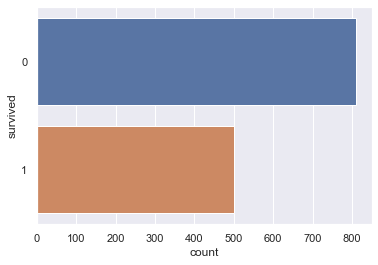

In [32]:
sns.countplot( y='survived', data=DataFrame)


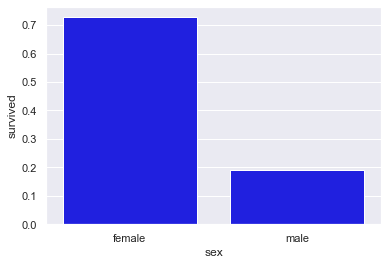

In [39]:
sns.barplot(data = DataFrame
            ,x = 'sex'
            ,y = 'survived'
            ,color = 'blue'
            ,ci = None
            )